In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.linear_model import LinearRegression


In [3]:
import os
os.getcwd()
os.listdir()

['.anaconda',
 '.bash_history',
 '.cache',
 '.conda',
 '.condarc',
 '.config',
 '.continuum',
 '.git-for-windows-updater',
 '.idea',
 '.idlerc',
 '.ipynb_checkpoints',
 '.ipython',
 '.jdks',
 '.jupyter',
 '.matplotlib',
 '.spyder-py3',
 '.thumbnails',
 '.vscode',
 '0 images.jpeg',
 '1 images.jpeg',
 'a.exe',
 'agepointer',
 'ansel',
 'AppData',
 'Application Data',
 'array.c',
 'assignment1.ipynb',
 'c.tutorial',
 'Contacts',
 'Cookies',
 'day 14 pacific.ipynb',
 'Documents',
 'Downloads',
 'Favorites',
 'FEB 24 DS DAY 11.ipynb',
 'Feb 24 DS Day 12.ipynb',
 'FEB 24 DS day 13.ipynb',
 'FEB 24 DS Day 14.ipynb',
 'FEB 24 DSA DAY 10 linear regression and multiple regression.ipynb',
 'Feb 24 DSA day 7.ipynb',
 'FEB 24 DSA day 8 Matplotlib.ipynb',
 'FEB 24 DSA day 8.ipynb',
 'FEB 24 DSA DAY 9.ipynb',
 'FEB 24 DSA DAY15.ipynb',
 'FEB 24 DSA Linear regression.ipynb',
 'feb24 data science 1.ipynb',
 'feb24 dDay2 introduction to python.ipynb',
 'feb24 DSA day3.ipynb',
 'feb24 DSA day4.ipynb',
 '

In [7]:
df=pd.read_excel("C:\\Users\MEENAL\\.jupyter\\Jumbo & Company_ Attach % .xls")
display(df)

,Branch,Store_Name,Dec,Nov,Oct,Sep,Aug
0,Delhi_Ncr,Delhi(Janakpuri) Br,0.23,0.17,0.16,0.25,0.24
1,Delhi_Ncr,Haryana(Gurgaon) Br,0.21,0.26,0.15,0.28,0.04
2,Delhi_Ncr,Up(Greater Noida) Br,0.25,0.36,0.30,0.41,0.43
3,Pune,Pune(Bhosari) Br,0.33,0.33,0.36,0.13,0.32
4,Gujarat,Ahmedabad(Maninagar) Br,0.19,0.11,0.14,0.21,0.17
...,...,...,...,...,...,...,...
158,Gujarat,Vadodara(Manjalpur) Br,0.25,0.12,0.15,0.00,0.01
159,Thane,Kharghar Br,0.00,0.00,0.00,0.00,0.00
160,Telangana,Ap(Tirupathi-Leela Mahal Circle),0.00,0.00,0.00,0.00,0.00
161,Telangana,Ap(Rajamundry),0.00,0.00,0.00,0.00,0.00


In [8]:
df.head()

,Branch,Store_Name,Dec,Nov,Oct,Sep,Aug
0,Delhi_Ncr,Delhi(Janakpuri) Br,0.23,0.17,0.16,0.25,0.24
1,Delhi_Ncr,Haryana(Gurgaon) Br,0.21,0.26,0.15,0.28,0.04
2,Delhi_Ncr,Up(Greater Noida) Br,0.25,0.36,0.30,0.41,0.43
3,Pune,Pune(Bhosari) Br,0.33,0.33,0.36,0.13,0.32
4,Gujarat,Ahmedabad(Maninagar) Br,0.19,0.11,0.14,0.21,0.17


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Branch      163 non-null    object 
 1   Store_Name  163 non-null    object 
 2   Dec         163 non-null    float64
 3   Nov         163 non-null    float64
 4   Oct         163 non-null    float64
 5   Sep         163 non-null    float64
 6   Aug         163 non-null    float64
dtypes: float64(5), object(2)
memory usage: 9.0+ KB


In [11]:
df.describe()

,Dec,Nov,Oct,Sep,Aug
count,163.000000,163.000000,163.000000,163.000000,163.000000
mean,0.217239,0.217117,0.170920,0.167301,0.128589
std,0.173270,0.131246,0.116125,0.134518,0.116640
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.095000,0.130000,0.100000,0.080000,0.035000
50%,0.200000,0.200000,0.160000,0.150000,0.110000
75%,0.300000,0.295000,0.240000,0.245000,0.190000
max,1.000000,0.700000,0.710000,0.800000,0.600000


In [41]:
# Standardize column names
df.columns = (
    df.columns
    .str.lower()
    .str.strip()
    .str.replace(" ", "_")
    .str.replace("%", "pct")
)

In [84]:
#Missing value
df.fillna(0,inplace=True)

In [54]:
df.rename(columns={
    "aug": "attach_aug",
    "sep": "attach_sep",
    "oct": "attach_oct",
    "nov": "attach_nov",
    "dec": "attach_dec"
}, inplace=True)

In [55]:
df_long = df.melt(
    id_vars=["branch", "store_name"],
    value_vars=["attach_aug", "attach_sep", "attach_oct", "attach_nov", "attach_dec"],
    var_name="month",
    value_name="attach_pct"
)

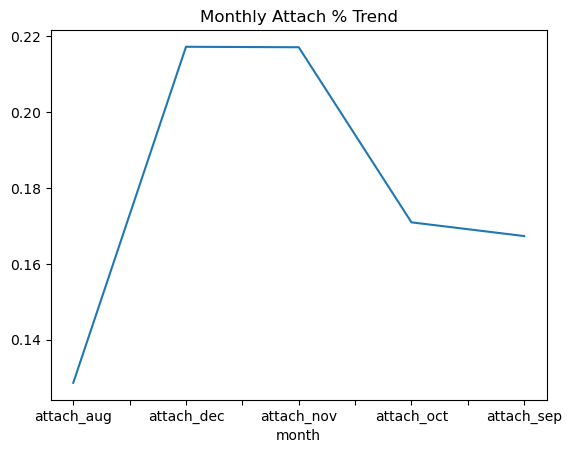

In [60]:
# Trend Analysis
#Month_Wise analysis
monthly_avg=df_long.groupby("month")["attach_pct"].mean()
monthly_avg.plot(title="Monthly Attach % Trend")
plt.show()

In [75]:
#Branch_wise analysis
branch_per = df_long.groupby("branch")["attach_pct"].agg(["mean", "std"])
branch_per.sort_values("mean", ascending=False)


,mean,std
branch,,
Pune,0.276500,0.161489
Delhi_Ncr,0.243682,0.151089
Mumbai,0.173474,0.122472
Thane,0.148600,0.112869
Gujarat,0.134583,0.089798
Telangana,0.118350,0.111128


In [81]:
#Store_wise analysis
store_per= df_long.groupby("store_name")["attach_pct"].agg(["mean", "std"])
store_per.sort_values("mean",ascending=False)

,mean,std
store_name,,
Delhi(Hauz Khas),0.622,0.107796
Pune(Hadapsar),0.586,0.149432
Pune(Kondhawa),0.414,0.131263
Delhi(Budh Vihar),0.390,0.112472
Delhi(Daryaganj),0.386,0.083845
...,...,...
Currey Road,0.000,0.000000
Vadodara(Kothi Road),0.000,0.000000
Ap(Tirupathi-Leela Mahal Circle),0.000,0.000000


In [99]:
def categorize_store(row):
    if row["mean"] >=store_per["mean"].quantile(0.75) and row["std"] <=store_per["std"].median():
        return "High Performer - Consistent"
    elif row["mean"] >=store_per["mean"].quantile(0.75):
        return "High Performer -Volatile"
    elif row["mean"] <store_per["mean"].quantile(0.25):
        return "Low Performer- Underperforming"
    else:
        return "Average Performer"
    
    store_per["category"]= store_per['attach_percent'].apply(categorize_store, axis=1)

In [100]:
df["jan_attach_pred"]=df[["attach_aug", "attach_sep", 
                          "attach_oct", "attach_nov","attach_dec"]].mean(axis=1)


In [101]:
# JANUARY ATTACH % PREDICTION
predictions=[]
final_output = df[["branch", "store_name", "jan_attach_pred"]]
final_output.sort_values("jan_attach_pred", ascending=False)


,branch,store_name,jan_attach_pred
10,Delhi_Ncr,Delhi(Hauz Khas),0.622
69,Pune,Pune(Hadapsar),0.586
64,Pune,Pune(Kondhawa),0.414
81,Delhi_Ncr,Delhi(Budh Vihar),0.390
17,Delhi_Ncr,Delhi(Daryaganj),0.386
...,...,...,...
33,Mumbai,MAHIM(VS Next),0.000
159,Thane,Kharghar Br,0.000
160,Telangana,Ap(Tirupathi-Leela Mahal Circle),0.000
161,Telangana,Ap(Rajamundry),0.000
